In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from epidexus import ItineraryEntry, Location, EpidexusModel, Person, SEIR
from datetime import datetime, timedelta

start_date = datetime(year=2020, month=4, day=1)
sim_model = EpidexusModel(start_date, sim_time_step=timedelta(hours=1))

vks = Location(name="Væsterkæret Skole", infection_probability=0.001)

def school_scheduler(current_time: datetime):
    from_time = current_time + timedelta(days=1)
    from_time = from_time.replace(hour=8)
    return from_time, timedelta(hours=5)

t, dt = school_scheduler(start_date - timedelta(days=1))
vks_it = ItineraryEntry(vks, t, dt, school_scheduler)

for i in range(200):
    hl = Location("Home-" + str(i))
    p = Person(i, sim_model, hl)
    p.itinerary.add_entry(vks_it)
    sim_model.add_person(p)

# Hacking agent 0 to be infectious
sim_model.schedule.agents[0].infect()
sim_model.schedule.agents[0].infection_state.seir = SEIR.INFECTED

for i in range(1000):
    sim_model.step()

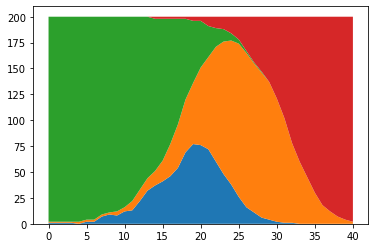

In [48]:
seir = sim_model.datacollector.get_model_vars_dataframe()
plt.stackplot(seir.axes[0], seir["E"], seir["I"], seir["S"], seir["R"], labels=["E", "I", "S", "R"])
plt.legend(loc='upper left')